# Regressão Linear Gradient Descent

In [10]:
# Requirements
!pip install -q numpy
!pip install -q pandas
!pip install -q matplotlib
!pip install -q scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import \
    BaseEstimator, RegressorMixin
from sklearn.datasets import load_iris

In [225]:
class LinearRegression:
    ''' Linear Regression via Gradient Descent '''

    #
    def __init__(self, epochs=1000, alpha=0.0001):
        self.epochs_ = epochs
        self.alpha_ = alpha

    #
    def fit(self, X, y):
        self.w = np.zeros(2)
        n, _ = X.shape

        for i in range(self.epochs_):
            # Current prediction
            y_hat = self.predict(X)

            # Errors
            e0 = (-2/n) * (y - y_hat).sum()
            e1 = (-2/n) * (X * (y - y_hat)).sum()

            # Update
            self.w[0] -= self.alpha_ * e0
            self.w[1] -= self.alpha_ * e1

    #
    def predict(self, X):
        return self.w[0] + self.w[1]*X

    #
    def fit_plot(self, X, y, figsize=(8, 6)):
        # Training
        self.fit(X, y)

        # Prediction
        y_hat = self.predict(X)

        # Plot
        plt.figure(figsize=figsize)
        
        plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], c='b', label='LRGD')
        plt.scatter(X, y, s=70, alpha=0.5, c='r', label='Train')

        plt.legend()
        plt.show()

In [226]:
data = load_iris()
X = data.data[:, 0:1]
y = data.data[:, 1]

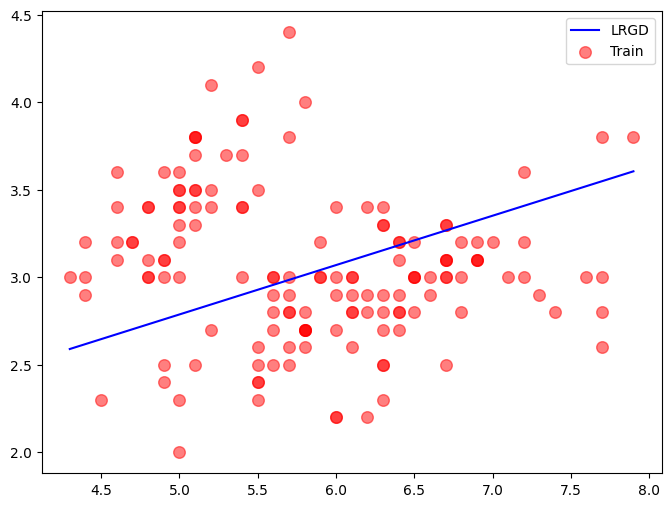

CPU times: user 198 ms, sys: 476 µs, total: 198 ms
Wall time: 197 ms


In [227]:
reg = LinearRegression()
%time reg.fit_plot(X, y)